In [22]:
import pandas as pd
import numpy as np
df = pd.read_excel("C:/Users/Sree Vidya/Desktop/ISB/Term 2/Foundation Project 1/Training/final_pre-ml.xlsx")

In [23]:
df_var= df[["Vader Compound Score","Textblob Score","EmoLex Score", 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]

from statsmodels import api as sm
from sklearn.model_selection import train_test_split

X = df_var
y = df["Close"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score

### FITTING A RANDOM FOREST REGRESSOR 
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rf= regressor.fit(X_train, y_train)
y_pred2 = rf.predict(X_valid)


In [25]:
df_test = pd.read_excel("C:/Users/Sree Vidya/Desktop/ISB/Term 2/Foundation Project 1/Output/final.xlsx")

In [26]:
X_test= df_test[["Vader Compound Score","Textblob Score","EmoLex Score", 'Anger', 'Anticipation', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust']]
X_test

,Vader Compound Score,Textblob Score,EmoLex Score,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0.9996,0.072409,0.028736,0.003619,0.014049,0.001277,0.00447,0.011069,0.001916,0.003406,0.027033


In [27]:
y_pred_5 = rf.predict(X_test)
y_pred_5

array([2526.085])

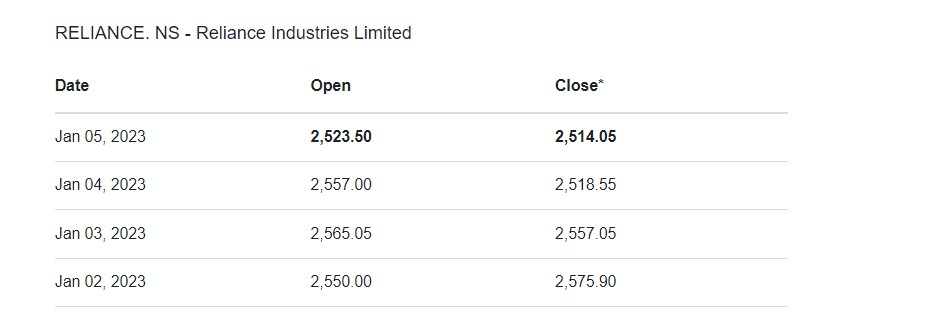

In [16]:
y_test_5 = [2523.50]

In [19]:
t1 = metrics.mean_absolute_error(y_test_5,y_pred_5)
t2 = np.mean(np.abs(y_test_5- y_pred_5)/y_test_5)*100
t3= metrics.mean_squared_error(y_test_5, y_pred_5)
t4 = np.sqrt(metrics.mean_squared_error(y_test_5, y_pred_5))

In [20]:
metrics=['MAE','MAPE', 'MSE', 'RMSE']
values_test=[t1,t2,t3,t4]

In [21]:
error = pd.DataFrame({'Errors' :metrics, 'RF Metrics': values_test})
error

,Errors,RF Metrics
0,MAE,9.825000
1,MAPE,0.389340
2,MSE,96.530625
3,RMSE,9.825000
